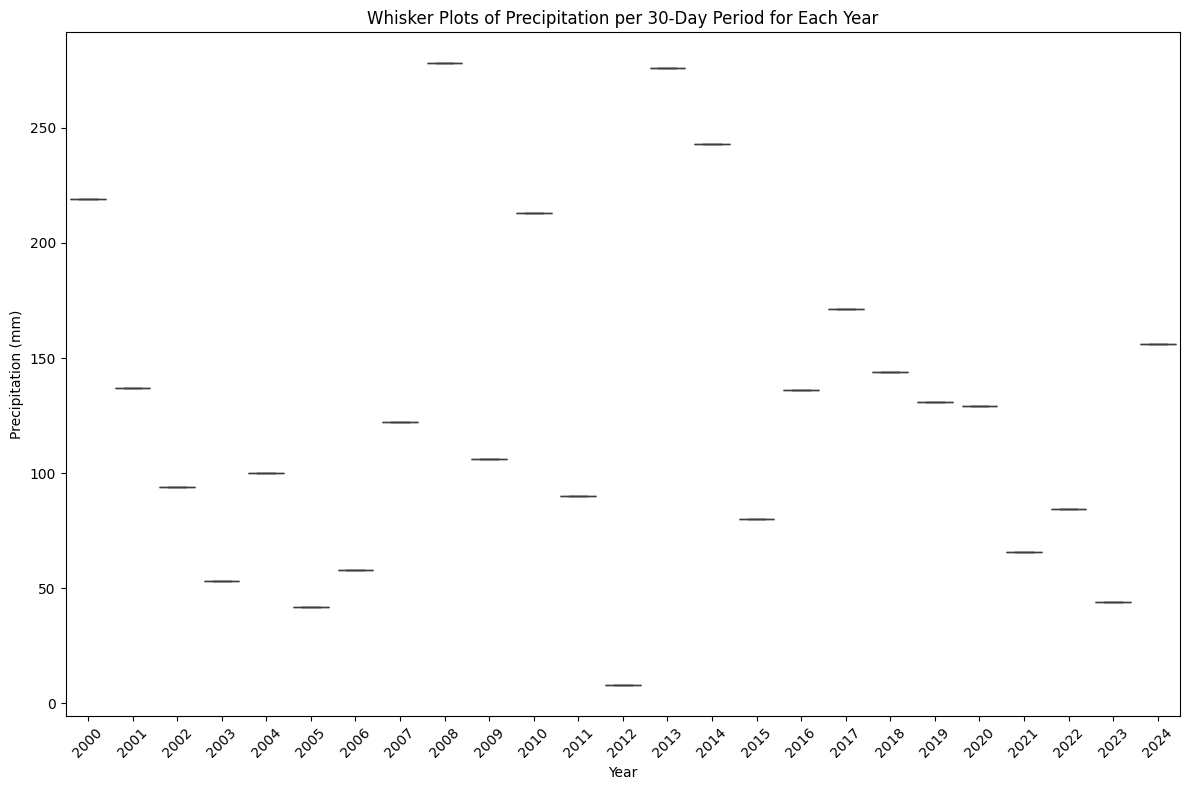

<Figure size 1400x800 with 0 Axes>

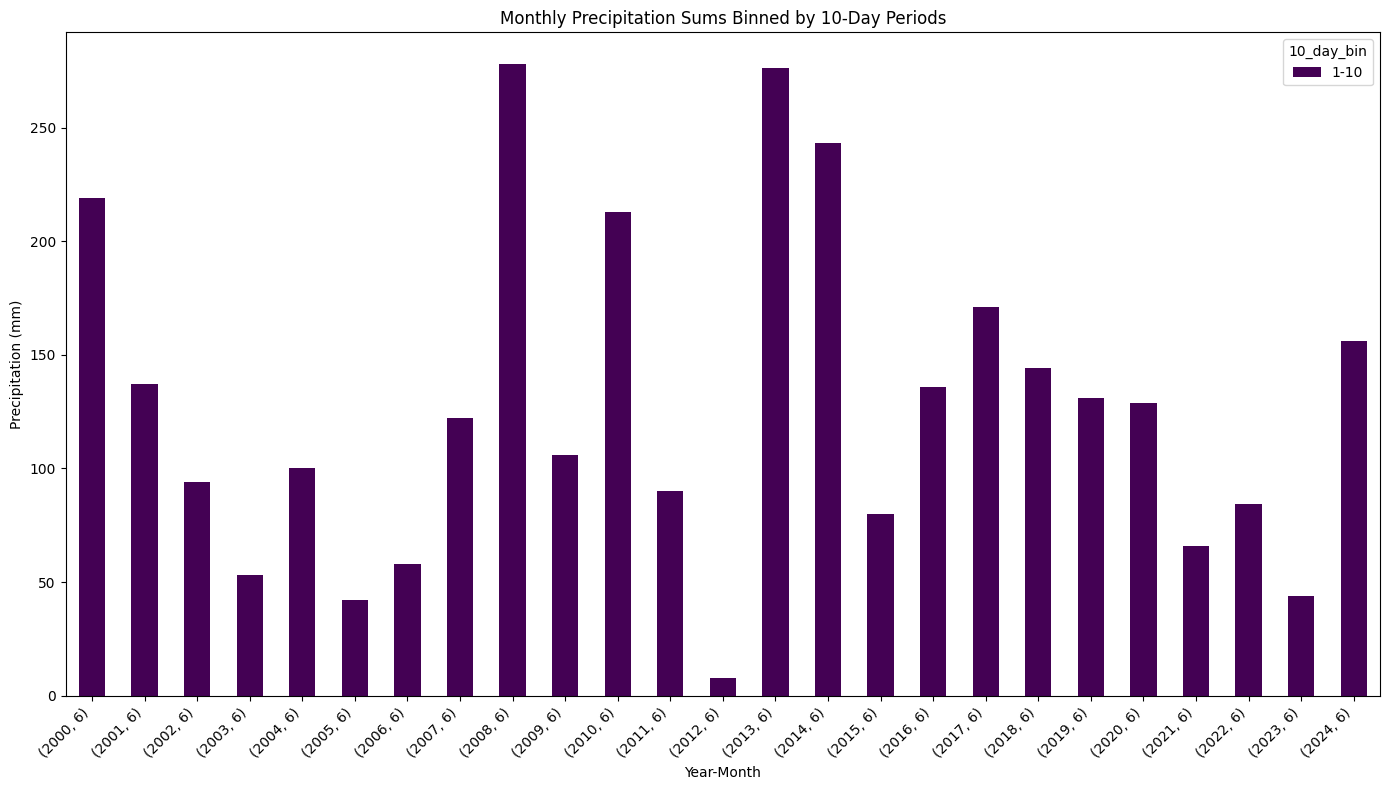

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load the CSV file ===
csv_file = '/Users/jasonraiti/Documents/GitHub/Open_Weather/Open_Weather/Meteostat/madison_precip_meteostat_2000_2024.csv'
data = pd.read_csv(csv_file)

# === Preprocess the data ===
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract the year, month, and day from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# === Whisker Plot Analysis ===
# Group data by year and month, and calculate statistics for each 30-day period
grouped_data = data.groupby(['year', 'month'])['precip_mm'].apply(list).reset_index()

# Create whisker plots for each year
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='precip_mm', data=grouped_data.explode('precip_mm'))
plt.title('Whisker Plots of Precipitation per 30-Day Period for Each Year')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the whisker plot
output_file_whisker = '/Users/jasonraiti/Documents/GitHub/Open_Weather/Open_Weather/Meteostat/precipitation_whisker_plot.png'
plt.savefig(output_file_whisker)
plt.show()

# === 10-Day Bin Analysis ===
# Bin the data into 10-day periods within each month
def get_10_day_bin(day):
    if day <= 10:
        return '1-10'
    elif day <= 20:
        return '11-20'
    else:
        return '21-30'

data['10_day_bin'] = data['day'].apply(get_10_day_bin)

# Group data by year, month, and 10-day bin, and calculate the sum of precipitation
grouped_data_bins = data.groupby(['year', 'month', '10_day_bin'])['precip_mm'].sum().reset_index()

# Create a pivot table for visualization
pivot_data = grouped_data_bins.pivot(index=['year', 'month'], columns='10_day_bin', values='precip_mm').fillna(0)

# Plot the data as a stacked bar chart
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Monthly Precipitation Sums Binned by 10-Day Periods')
plt.xlabel('Year-Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the stacked bar chart
output_file_barchart = '/Users/jasonraiti/Documents/GitHub/Open_Weather/Open_Weather/Meteostat/precipitation_barchart.png'
plt.savefig(output_file_barchart)
plt.show()